In [29]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [30]:
from ucimlrepo import fetch_ucirepo 


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('C:\\Users\\suvar\\OneDrive\\Desktop\\breast+cancer.zip')

In [33]:
data.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [34]:
data.shape

(285, 10)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,auc

In [36]:
# Extracting the target variable
X = data.drop('no.1', axis=1)
y = data['no.1']


In [37]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low
0,0.0,2.0,2.0,3.0,0.0,1.0,2,1.0,5.0
1,0.0,2.0,2.0,3.0,0.0,1.0,2,0.0,2.0
2,0.0,4.0,0.0,2.0,0.0,1.0,2,1.0,3.0
3,0.0,2.0,2.0,0.0,0.0,1.0,2,1.0,4.0
4,0.0,4.0,0.0,2.0,0.0,1.0,2,0.0,2.0


In [40]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: no.1, dtype: object

In [41]:
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(reduced_X_train)
X_test_scaled = scaler.transform(reduced_X_test)

In [43]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [44]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [45]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [46]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)


In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [48]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
predictions = [lr_pred, dt_pred, rf_pred, svm_pred, knn_pred]

In [49]:
for i, pred in enumerate(predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    print(f"{models[i]}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, F1-score = {f1}")

Logistic Regression: Accuracy = 0.7368421052631579, Precision = 0.6809425524595805, Recall = 0.7368421052631579, F1-score = 0.7049248348281255
Decision Tree: Accuracy = 0.7192982456140351, Precision = 0.738007606428659, Recall = 0.7192982456140351, F1-score = 0.7278752436647173
Random Forest: Accuracy = 0.7543859649122807, Precision = 0.7368421052631579, Recall = 0.7543859649122807, F1-score = 0.7447181784247853
SVM: Accuracy = 0.8070175438596491, Precision = 0.8004852556924225, Recall = 0.8070175438596491, F1-score = 0.8034602635621312
KNN: Accuracy = 0.8421052631578947, Precision = 0.8369540873460246, Recall = 0.8421052631578947, F1-score = 0.8391947610962891


In [50]:
svm_probs = svm_model.predict_proba(X_test_scaled)
svm_probs = svm_probs[:, 1]
svm_probs_reshaped = svm_probs.reshape(-1, 1)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=['no','yes'])
classes = ['no','yes']

svm_auc = roc_auc_score(y_test_bin, svm_probs_reshaped, multi_class='ovr')

print(f"SVM AUC: {svm_auc}")

SVM AUC: 0.6956521739130436


In [51]:
print(np.sum(svm_probs, axis=0))

14.576230946550663


In [52]:
print(y_test)
print(y_test.shape)

9       no
249     no
157     no
209     no
75      no
232    yes
264     no
170     no
42      no
225     no
46      no
267     no
143     no
168    yes
5       no
217     no
230     no
140     no
154    yes
33      no
109     no
60      no
68      no
218     no
56      no
93      no
77      no
276    yes
273    yes
108     no
254     no
158     no
167     no
45      no
79      no
208     no
66      no
82      no
179    yes
186    yes
30      no
22      no
24      no
132     no
73      no
202     no
224    yes
246    yes
90      no
203     no
262     no
175     no
92      no
6       no
126    yes
255    yes
271     no
Name: no.1, dtype: object
(57,)


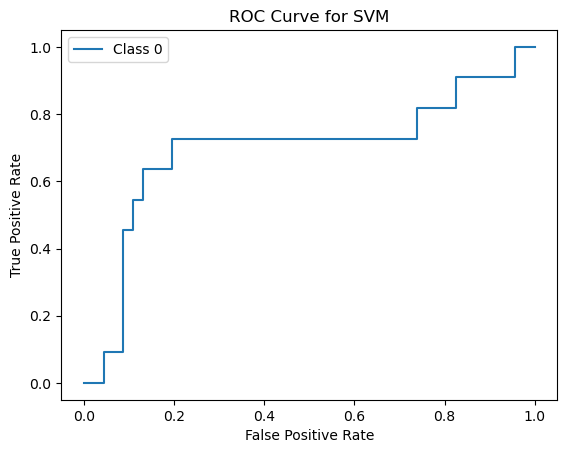

In [54]:
# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_test_bin.shape[1]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_probs)



# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()